## Simple Linear Regression

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [160]:
df=pd.read_csv('height-weight.csv')

In [161]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [162]:
df['Height'].isnull().sum()

np.int64(0)

In [163]:
df['Weight'].isnull().sum() 

np.int64(0)

Text(0, 0.5, 'Height')

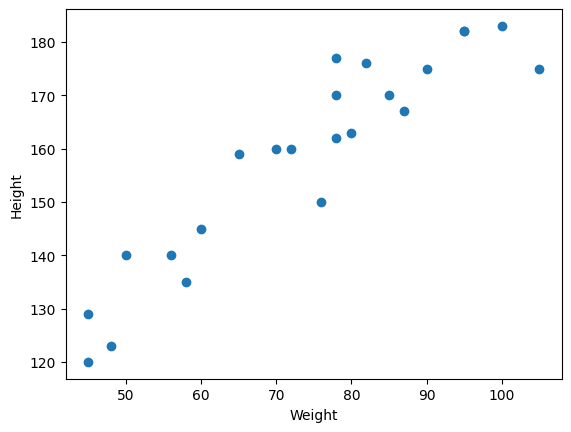

In [164]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [165]:
## divide our dataset into independent and dependent edatures
X=df[['Weight']] ##independent feature
y=df['Height'] ##dependent feature

In [166]:
## Train test split
from sklearn.model_selection import train_test_split

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [168]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [169]:
## standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [170]:
X_train_scalar=scaler.fit_transform(X_train)
X_test_scalar=scaler.transform(X_test)

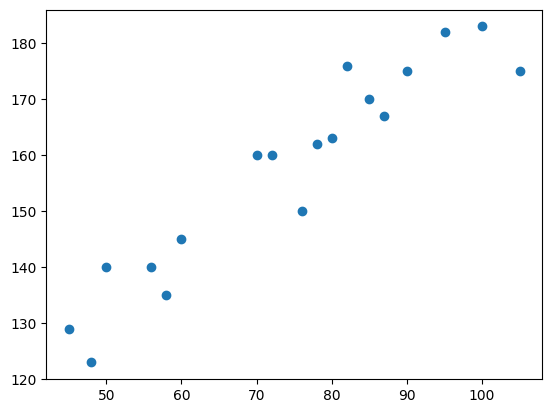

In [171]:
plt.scatter(X_train, y_train)

In [172]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train_scalar,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [173]:
print("The slope or coefficient of weight is ",regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope or coefficient of weight is  [17.03440872]
Intercept: 157.5


#### This plot is used to:

Visualize how the model learned from training data

Show the best-fit line

Help understand the model behavior

C:\Users\ddurande\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


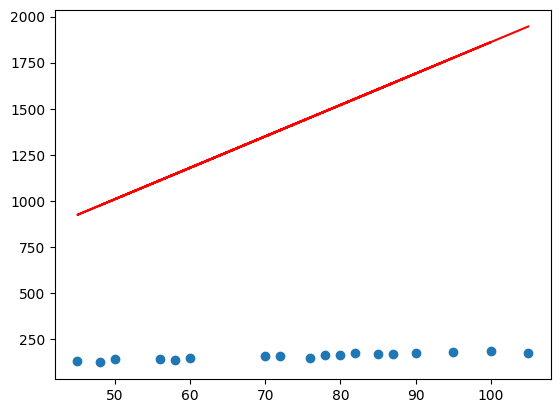

In [174]:
# scatter graph before prediction on the train data\
# plot shows the regression line x_train vs predicted y_train
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

#### 1. Linear Regression Equation
In simple linear regression, the prediction is made using:

y = intercept + coefficient × X


In your case:

Intercept = 157.5

Coefficient (weight) = 17.03

Prediction on Training Data
Formula
y_pred_train = 157.5 + 17.03 × X_train

Why Do We Predict on Training Data?

To visualize the best-fit line

To understand how well the model learned the relationship

Not used for final evaluation

In [175]:
y_pred_test=regressor.predict(X_test_scalar)

C:\Users\ddurande\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


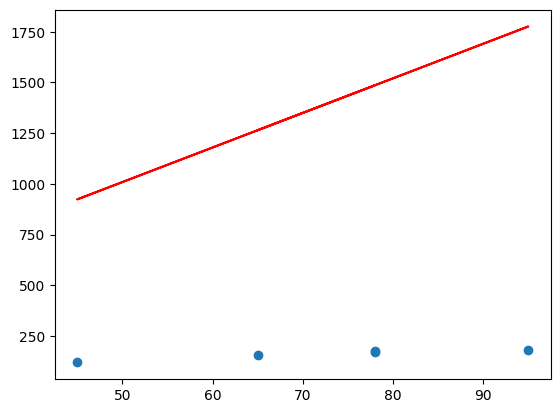

In [176]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

## Performance Metrics

## MSE,MAE,RMSE
## R square and adjusted R square

In [177]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [178]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [179]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [180]:
score

0.776986986042344

## Adjusted R Square

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

Adjusted R² is an improved version of R² that:

Penalizes the model for adding unnecessary features

Problem with R²:

R² always increases when you add more features

Even if the new feature is useless

Adjusted R²:

Increases only if a new feature actually improves the model

Decreases if the feature is not useful

Adjusted R² = 1 − [(1 − R²) × (n − 1) / (n − k − 1)]
R² → how well model fits

n → number of data points

k → number of input features

In [181]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [182]:
regressor

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [185]:
weight=input("Enter weight in pounds to predict height: ")
weight=float(weight)
scaled_weight=scaler.transform([[weight]])
predicted_height=regressor.predict(scaled_weight)
print("The predicted height is ",predicted_height[0],"inches")

The predicted height is  161.0846708559816 inches


C:\Users\ddurande\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


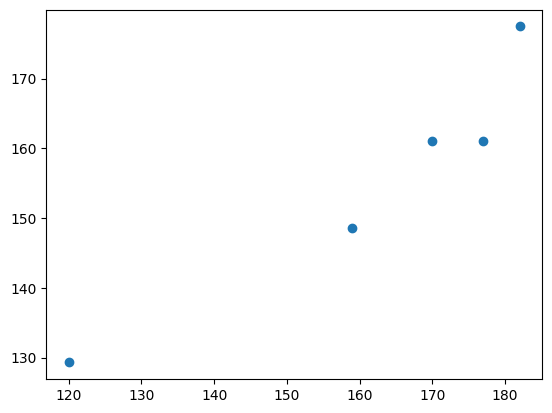

In [186]:
plt.scatter(y_test, y_pred_test)

Residual = Actual value − Predicted value

To Measure Model Error

Residuals tell us:

How far the model’s prediction is from the actual value.

Small residual → good prediction

Large residual → poor prediction


Simple Example

Actual height = 170
Predicted height = 165

Residual = 170 − 165 = +5


Model under-predicted by 5 units.

In [187]:
residuals=y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

## plot this residuals
import seaborn as sns
sns.distplot(residuals,kde=True)

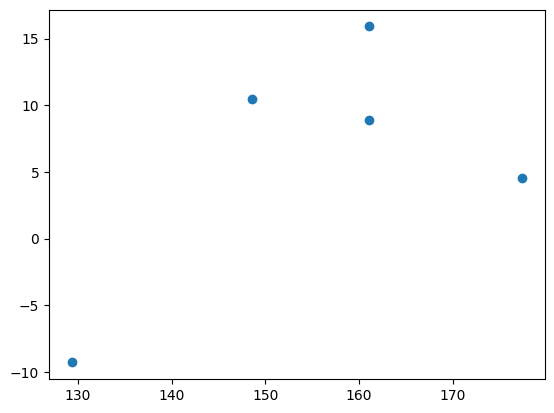

In [188]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)

C:\Users\ddurande\AppData\Local\Temp\ipykernel_7876\2747191050.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

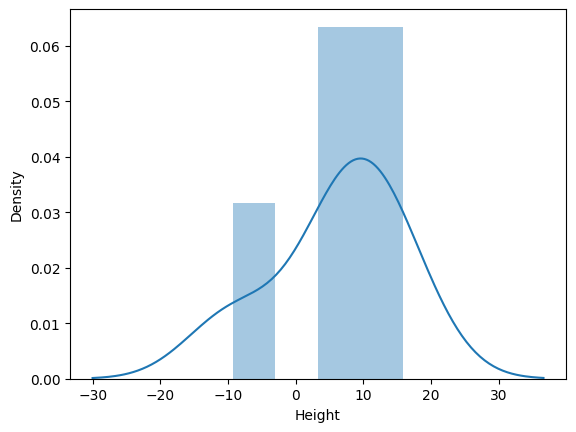

In [189]:
## plot this residuals
import seaborn as sns
sns.distplot(residuals,kde=True)